# **Setup**

* https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection

In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import seaborn as sns

# **Data Import**

## **Download Data**

In [2]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Learning\\18 Oil Spill Detection'

In [3]:
# os.chdir('Input Data')
# !kaggle datasets download -d sudhanshu2198/oil-spill-detection

# os.chdir('..')

## **Load Data**

In [4]:
df = pd.read_csv('Input Data/Oil_spill.csv')

print(df.shape)
df.sample(10)

(937, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
700,53,26,3.69,493.00,70,210600,71.46,10.83,1625.0,0.15,...,371.08,402.49,287.93,90.91,1.29,0,5321.40,65.98,5.98,0
815,83,19,3.00,341.68,79,153900,44.58,17.98,1334.0,0.40,...,458.91,270.00,180.00,90.00,2.55,0,3321.87,65.78,6.14,0
867,135,34,3.82,410.09,89,275400,56.32,15.96,2043.0,0.28,...,810.00,360.00,220.00,120.00,3.68,0,2910.40,65.87,6.07,0
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
386,117,169,1398.26,1414.93,153,422500,42.28,9.79,3160.0,0.23,...,782.62,670.82,362.89,249.44,2.16,0,15451.85,66.17,7.52,0
772,40,16,34.69,437.19,62,129600,46.00,7.68,1281.0,0.17,...,649.00,127.28,63.64,69.71,10.20,1,2246.93,65.92,6.14,0
65,55,187,1615.63,956.90,153,467500,38.91,6.43,5190.0,0.17,...,1297.11,738.24,296.35,194.53,4.38,0,6804.88,66.02,8.00,0
769,37,15,60.67,285.93,70,121500,49.53,6.86,1281.0,0.14,...,655.21,180.00,77.14,62.11,8.49,0,2435.84,65.73,6.37,0
77,67,187,1713.10,1409.81,40,467500,34.83,6.56,3450.0,0.19,...,1171.54,602.08,318.45,179.81,3.68,0,3922.80,66.26,7.95,0
461,29,89,18.71,825.72,144,125156,31.97,14.03,2238.0,0.44,...,750.00,167.71,116.26,41.31,6.45,0,22546.51,35.98,15.11,0


# **Data Validation**

## **Columns**

In [5]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [6]:
# Rename Columns Names
Col_Name_List = df.columns.to_list()
print(Col_Name_List)

New_Col_Name_List = [name.replace('f_','f') for name in Col_Name_List]
print(New_Col_Name_List)

# Assign New Column Names
df.columns = New_Col_Name_List
df.columns

['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'target']
['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target']


Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41',
       'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target'],
      dtype='object')

## **Head & Tail**

In [7]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [8]:
df.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
936,204,11,7.73,235.73,135,89100,61.82,12.24,831.0,0.20,...,254.56,254.56,127.28,180.00,2.00,0,3782.68,65.65,6.26,0


## **Missing Values**

In [9]:
df.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       0
f37       0
f38       0
f39       0
f40       0
f41       0
f42       0
f43       0
f44       0
f45       0
f46       0
f47       0
f48       0
f49       0
target    0
dtype: int64

## **Info**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      937 non-null    int64  
 1   f2      937 non-null    int64  
 2   f3      937 non-null    float64
 3   f4      937 non-null    float64
 4   f5      937 non-null    int64  
 5   f6      937 non-null    int64  
 6   f7      937 non-null    float64
 7   f8      937 non-null    float64
 8   f9      937 non-null    float64
 9   f10     937 non-null    float64
 10  f11     937 non-null    float64
 11  f12     937 non-null    float64
 12  f13     937 non-null    float64
 13  f14     937 non-null    float64
 14  f15     937 non-null    float64
 15  f16     937 non-null    float64
 16  f17     937 non-null    float64
 17  f18     937 non-null    float64
 18  f19     937 non-null    float64
 19  f20     937 non-null    float64
 20  f21     937 non-null    float64
 21  f22     937 non-null    float64
 22  f2

## **Target Imbalance**

target
0    896
1     41
Name: count, dtype: int64


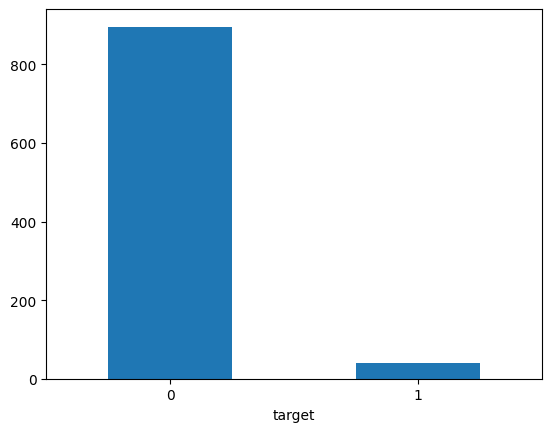

In [11]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# **Data Exploration**

## **Correlation Heatmap**

In [12]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41',
       'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target'],
      dtype='object')

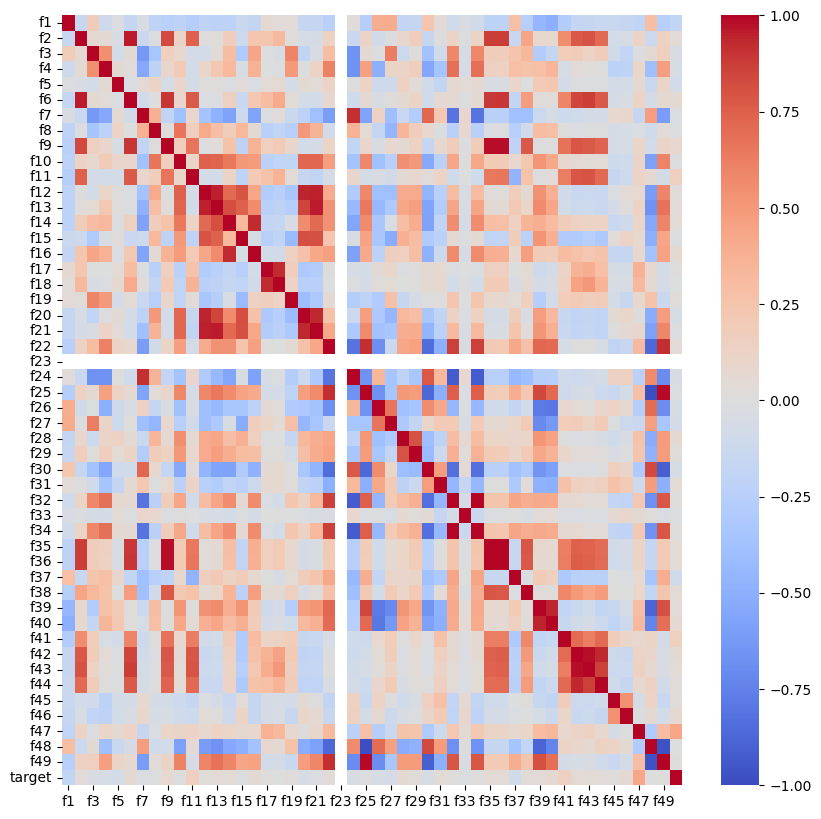

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

## **Distribution**  

<Axes: xlabel='f3'>

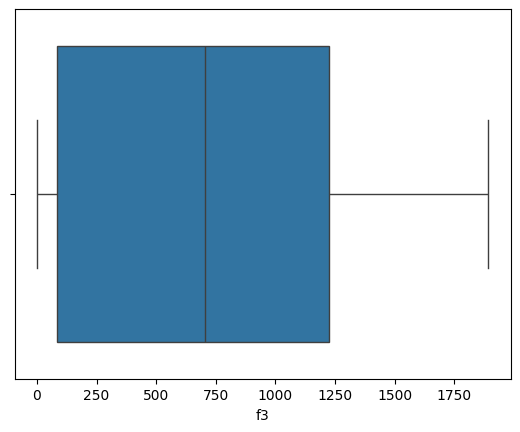

In [36]:
sns.boxplot(data=df,x='f3',orient='h')

# **Feature Selection**

## **Outlier Capping/Removal**

In [ ]:
def handle_outliers(df, outlier_proportion=0.05):
    """
    Identifies and handles outliers in each numeric feature of a DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        outlier_proportion (float, optional): Proportion threshold for outlier removal. Defaults to 0.05.

    Returns:
        pd.DataFrame: Processed DataFrame with outliers removed or capped.
    """
    import pandas as pd 
    import numpy as np
    
    # Calculate the upper and lower quartiles for each numeric column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the outlier thresholds
    Lower_Threshold = Q1 - 1.5 * IQR
    Upper_Threshold = Q3 + 1.5 * IQR

    # Identify outliers for each column
    Outliers = (df < Lower_Threshold) | (df > Upper_Threshold)

    # Calculate the proportion of outliers for each column
    Outlier_proportions = Outliers.mean()

    # Filter columns based on the specified outlier proportion
    columns_to_process = outlier_proportions[outlier_proportions <= outlier_proportion].index

    # Remove or cap outliers
    for col in columns_to_process:
        if col in df.select_dtypes(include=np.number):
            df = df[~outliers[col]]

        else:
            # Cap Outliers At Lower & Upper Threshold
            df[col] = np.where(df[col] < lower_threshold[col], lower_threshold[col], df[col])
            df[col] = np.where(df[col] > upper_threshold[col], upper_threshold[col], df[col])

    return df

In [14]:
def outlier_removal(df, OL_Cap_Threshold):

    '''
    Removes outliers from the numeric columns of the dataframe.
    OL_Cap_Threshold = Outlier Capping Threshold
    '''

    for Feature in df.select_dtypes('number').columns:
        
        if df.shape[0] == 0:
            print('No Data Left In Dataframe!')
            break

        else:          
            Feature_Q1 = df[f'{Feature}'].quantile(.25)
            Feature_Q3 = df[f'{Feature}'].quantile(.75)
            Feature_IQR = round(Feature_Q3 - Feature_Q1,2)
            Feature_Upper_Fence = round(Feature_Q3 + (1.5*Feature_IQR),2)
            Feature_Lower_Fence = round(Feature_Q1 - (1.5*Feature_IQR),2)

            # Identify Outlier Count & Proportion
            Identified_Outlier_QTY = df[(df[f'{Feature}'] > Feature_Upper_Fence)|(df[f'{Feature}'] < Feature_Lower_Fence)].shape[0]
            print(f'Found {Identified_Outlier_QTY} Outliers In Feature {Feature}!')
            OL_Proportion = Identified_Outlier_QTY /df.shape[0]

            if Identified_Outlier_QTY = 0:
                print(f'No Outliers Found In Feature {Feature}!','\n')
                pass
            
            else:
                # Outlier Removal
                if OL_Proportion < OL_Cap_Threshold:
                    print('Dataframe Shape Before Outlier Removal: ',df.shape)
                    df_Copy = df.drop(df[(df[f'{Feature}'] > Feature_Upper_Fence)|(df[f'{Feature}'] < Feature_Lower_Fence)].index,inplace=False)                   
                    print('Dataframe Shape After Outlier Removal: ',df_Copy.shape,'\n')

                # Outlier Capping
                else:
                    print('Dataframe Shape Before Outlier Removal: ',df.shape)
                    df_Copy = df.drop(df[(df[f'{Feature}'] > Feature_Upper_Fence)|(df[f'{Feature}'] < Feature_Lower_Fence)].index,inplace=False)                   
                    print('Dataframe Shape After Outlier Removal: ',df_Copy.shape,'\n')

        
    return df

## **Target Variable Correlation**

## **Variance Threshold**

In [15]:
df_Feature_Var = df.var().to_frame().reset_index().rename(columns={'index':'Feature', 0:'Variance'})
df_Feature_Var.head()

,Feature,Variance
0,f1,4.221975e+03
1,f2,3.732387e+06
2,f3,3.599587e+05
3,f4,2.733191e+05
4,f5,2.057690e+03


### **Top 10 Features**

In [16]:
df_Feature_Var.sort_values(by='Variance', ascending=False).head(10)

,Feature,Variance
5,f6,1.467772e+13
8,f9,6.670687e+07
46,f47,4.698424e+07
35,f36,2.724190e+07
1,f2,3.732387e+06
40,f41,1.003365e+06
41,f42,5.117852e+05
24,f25,3.751064e+05
2,f3,3.599587e+05
42,f43,2.854831e+05


### **Feature Variance Statistics**

In [17]:
# Feature Variance Statistics
df_Feature_Var['Variance'].describe()

count    5.000000e+01
mean     2.935573e+11
std      2.075742e+12
min      0.000000e+00
25%      5.776253e-02
50%      2.051856e+01
75%      2.208448e+04
max      1.467772e+13
Name: Variance, dtype: float64

In [18]:
df_Feature_Var_Summary_Dict = df_Feature_Var['Variance'].describe().to_dict()
print(df_Feature_Var_Summary_Dict)

{'count': 50.0, 'mean': 293557317218.0454, 'std': 2075742392576.5564, 'min': 0.0, '25%': 0.05776253095668117, '50%': 20.518557875995402, '75%': 22084.481318558337, 'max': 14677718230495.863}


### **Top 50% Variance Features**

In [19]:
df_Feature_Var_Top = df_Feature_Var[df_Feature_Var['Variance']>df_Feature_Var_Summary_Dict['25%']]
df_Feature_Var_Top

,Feature,Variance
0,f1,4.221975e+03
1,f2,3.732387e+06
2,f3,3.599587e+05
3,f4,2.733191e+05
4,f5,2.057690e+03
5,f6,1.467772e+13
6,f7,1.617578e+02
7,f8,1.288004e+01
8,f9,6.670687e+07
10,f11,3.777436e+03


### **Features To Retain**

In [20]:
df = df.loc[:, df_Feature_Var_Top['Feature'].to_list() + ['target']]

print('Dataframe Shape: ',df.shape)
print('Column Names: ',df.columns.to_list(),'\n')

df.head()

Dataframe Shape:  (937, 38)
Column Names:  ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f11', 'f17', 'f18', 'f19', 'f22', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f32', 'f34', 'f35', 'f36', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'target'] 



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,214.7,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,901.7,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,86.1,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,166.5,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,232.8,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


## **Pairwise Correlation Check**

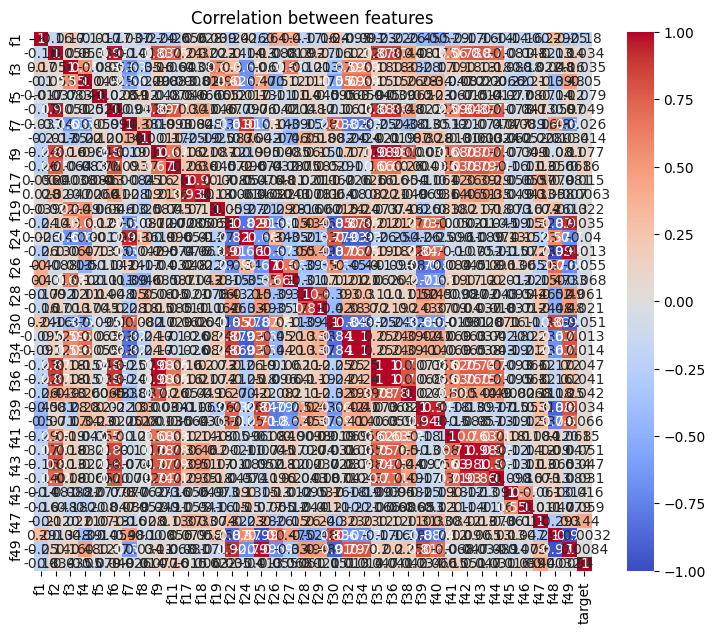

In [21]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [22]:
for col in df.columns:
    print(col)

f1
f2
f3
f4
f5
f6
f7
f8
f9
f11
f17
f18
f19
f22
f24
f25
f26
f27
f28
f29
f30
f32
f34
f35
f36
f38
f39
f40
f41
f42
f43
f44
f45
f46
f47
f48
f49
target


## **P-Value Check**

# **Data Split**

In [23]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11,...,f41,f42,f43,f44,f45,f46,f47,f48,f49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,214.7,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,901.7,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,86.1,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,166.5,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,232.8,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


## **Predictor & Target Variables**

In [24]:
X = df.drop('target', axis=1)
y = df['target']

print(X.shape, y.shape)

(937, 37) (937,)


## **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('Training Data: ',X_train.shape,y_train.shape)
print('Training Data: ',X_test.shape,y_test.shape)

Training Data:  (749, 37) (749,)
Training Data:  (188, 37) (188,)


# **Data Model**

## **Model 01 - Linear Regression**

F1 Score:  0.6
Recall Score:  0.6
Precision Score:  0.6 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       183
           1       0.60      0.60      0.60         5

    accuracy                           0.98       188
   macro avg       0.79      0.79      0.79       188
weighted avg       0.98      0.98      0.98       188



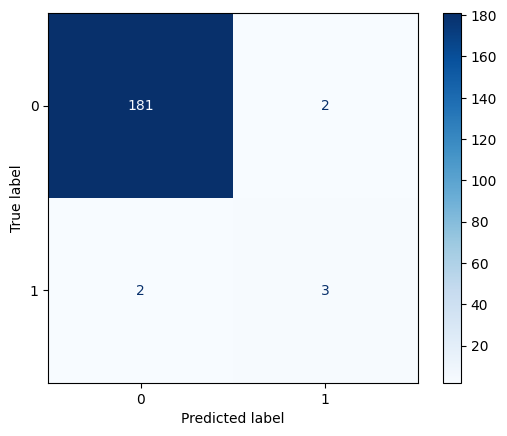

In [26]:
from sklearn.linear_model import LinearRegression,LogisticRegression

Model01 = LinearRegression()
Model01.fit(X_train, y_train)
y_pred01 = Model01.predict(X_test)
y_pred01 = (y_pred01 > 0.5).astype(int)

from sklearn.metrics import f1_score,recall_score,precision_score,ConfusionMatrixDisplay,classification_report
print('F1 Score: ',f1_score(y_test,y_pred01))
print('Recall Score: ',recall_score(y_test,y_pred01))
print('Precision Score: ',precision_score(y_test,y_pred01),'\n')
print(classification_report(y_test,y_pred01))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred01,cmap='Blues')

## **Model 02 - Random Forest**

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       183
           1       0.50      0.40      0.44         5

    accuracy                           0.97       188
   macro avg       0.74      0.69      0.72       188
weighted avg       0.97      0.97      0.97       188



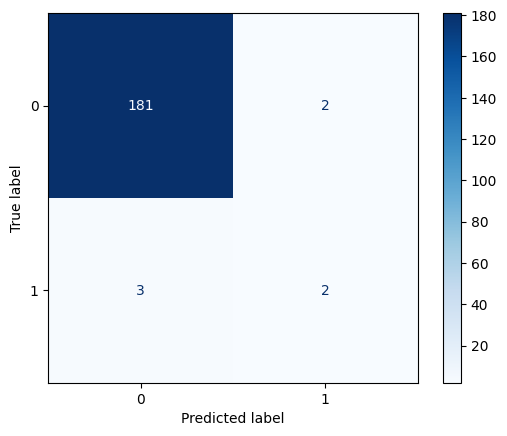

In [28]:
from sklearn.ensemble import RandomForestClassifier

Model02 = RandomForestClassifier(n_estimators=100, random_state=0)
Model02.fit(X_train, y_train)

# Predicted Output
y_pred02 = Model02.predict(X_test)
print(classification_report(y_test,y_pred02))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred02,cmap='Blues')